#### Data Ingetion

In [2]:
path  =  r"C:\Users\admin\Downloads\Cars93 (4).csv"

In [1]:
import pandas as  pd
import  numpy as  np
import  matplotlib.pyplot as  plt
import seaborn as  sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

#####  read  file

In [4]:
df  =  pd.read_csv(path  ,  keep_default_na = False  , 
na_values  =  ['' , "NA"]  )

#### Basic  checks

In [5]:
df.head()

id Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0   1        Acura  Integra    Small       12.9   15.9       18.8        25   
1   2        Acura   Legend  Midsize       29.2   33.9       38.7        18   
2   3         Audi       90  Compact       25.9   29.1       32.3        20   
3   4         Audi      100  Midsize       30.8   37.7       44.6        19   
4   5          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG.highway             AirBags  ... Passengers Length  Wheelbase  Width  \
0           31                None  ...          5    177        102     68   
1           25  Driver & Passenger  ...          5    195        115     71   
2           26         Driver only  ...          5    180        102     67   
3           26                 NaN  ...          6    193        106     70   
4           30         Driver only  ...          4    186        109     69   

   Turn.circle  Rear.seat.room Luggage.room  Weight   Origin           Make  
0           37            26.5         11.0    2705  non-USA  Acura Integra  
1           38            30.0         15.0    3560  non-USA   Acura Legend  
2           37            28.0         14.0    3375  non-USA        Audi 90  
3           37            31.0         17.0    3405  non-USA       Audi 100  
4           39            27.0         13.0    3640  non-USA       BMW 535i  

[5 rows x 28 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [7]:
df.dtypes

id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [8]:
##  check  missing value
df.isnull().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [9]:
## check  duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
##  drop  duplicate record 
df.drop_duplicates(keep  =  'first' , 
 ignore_index  =  True , inplace  =  True)


In [11]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

#### drop  column id  which not  related  to  weight

In [12]:
df.drop('id' , inplace  =  True ,  axis  =  1)

In [13]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

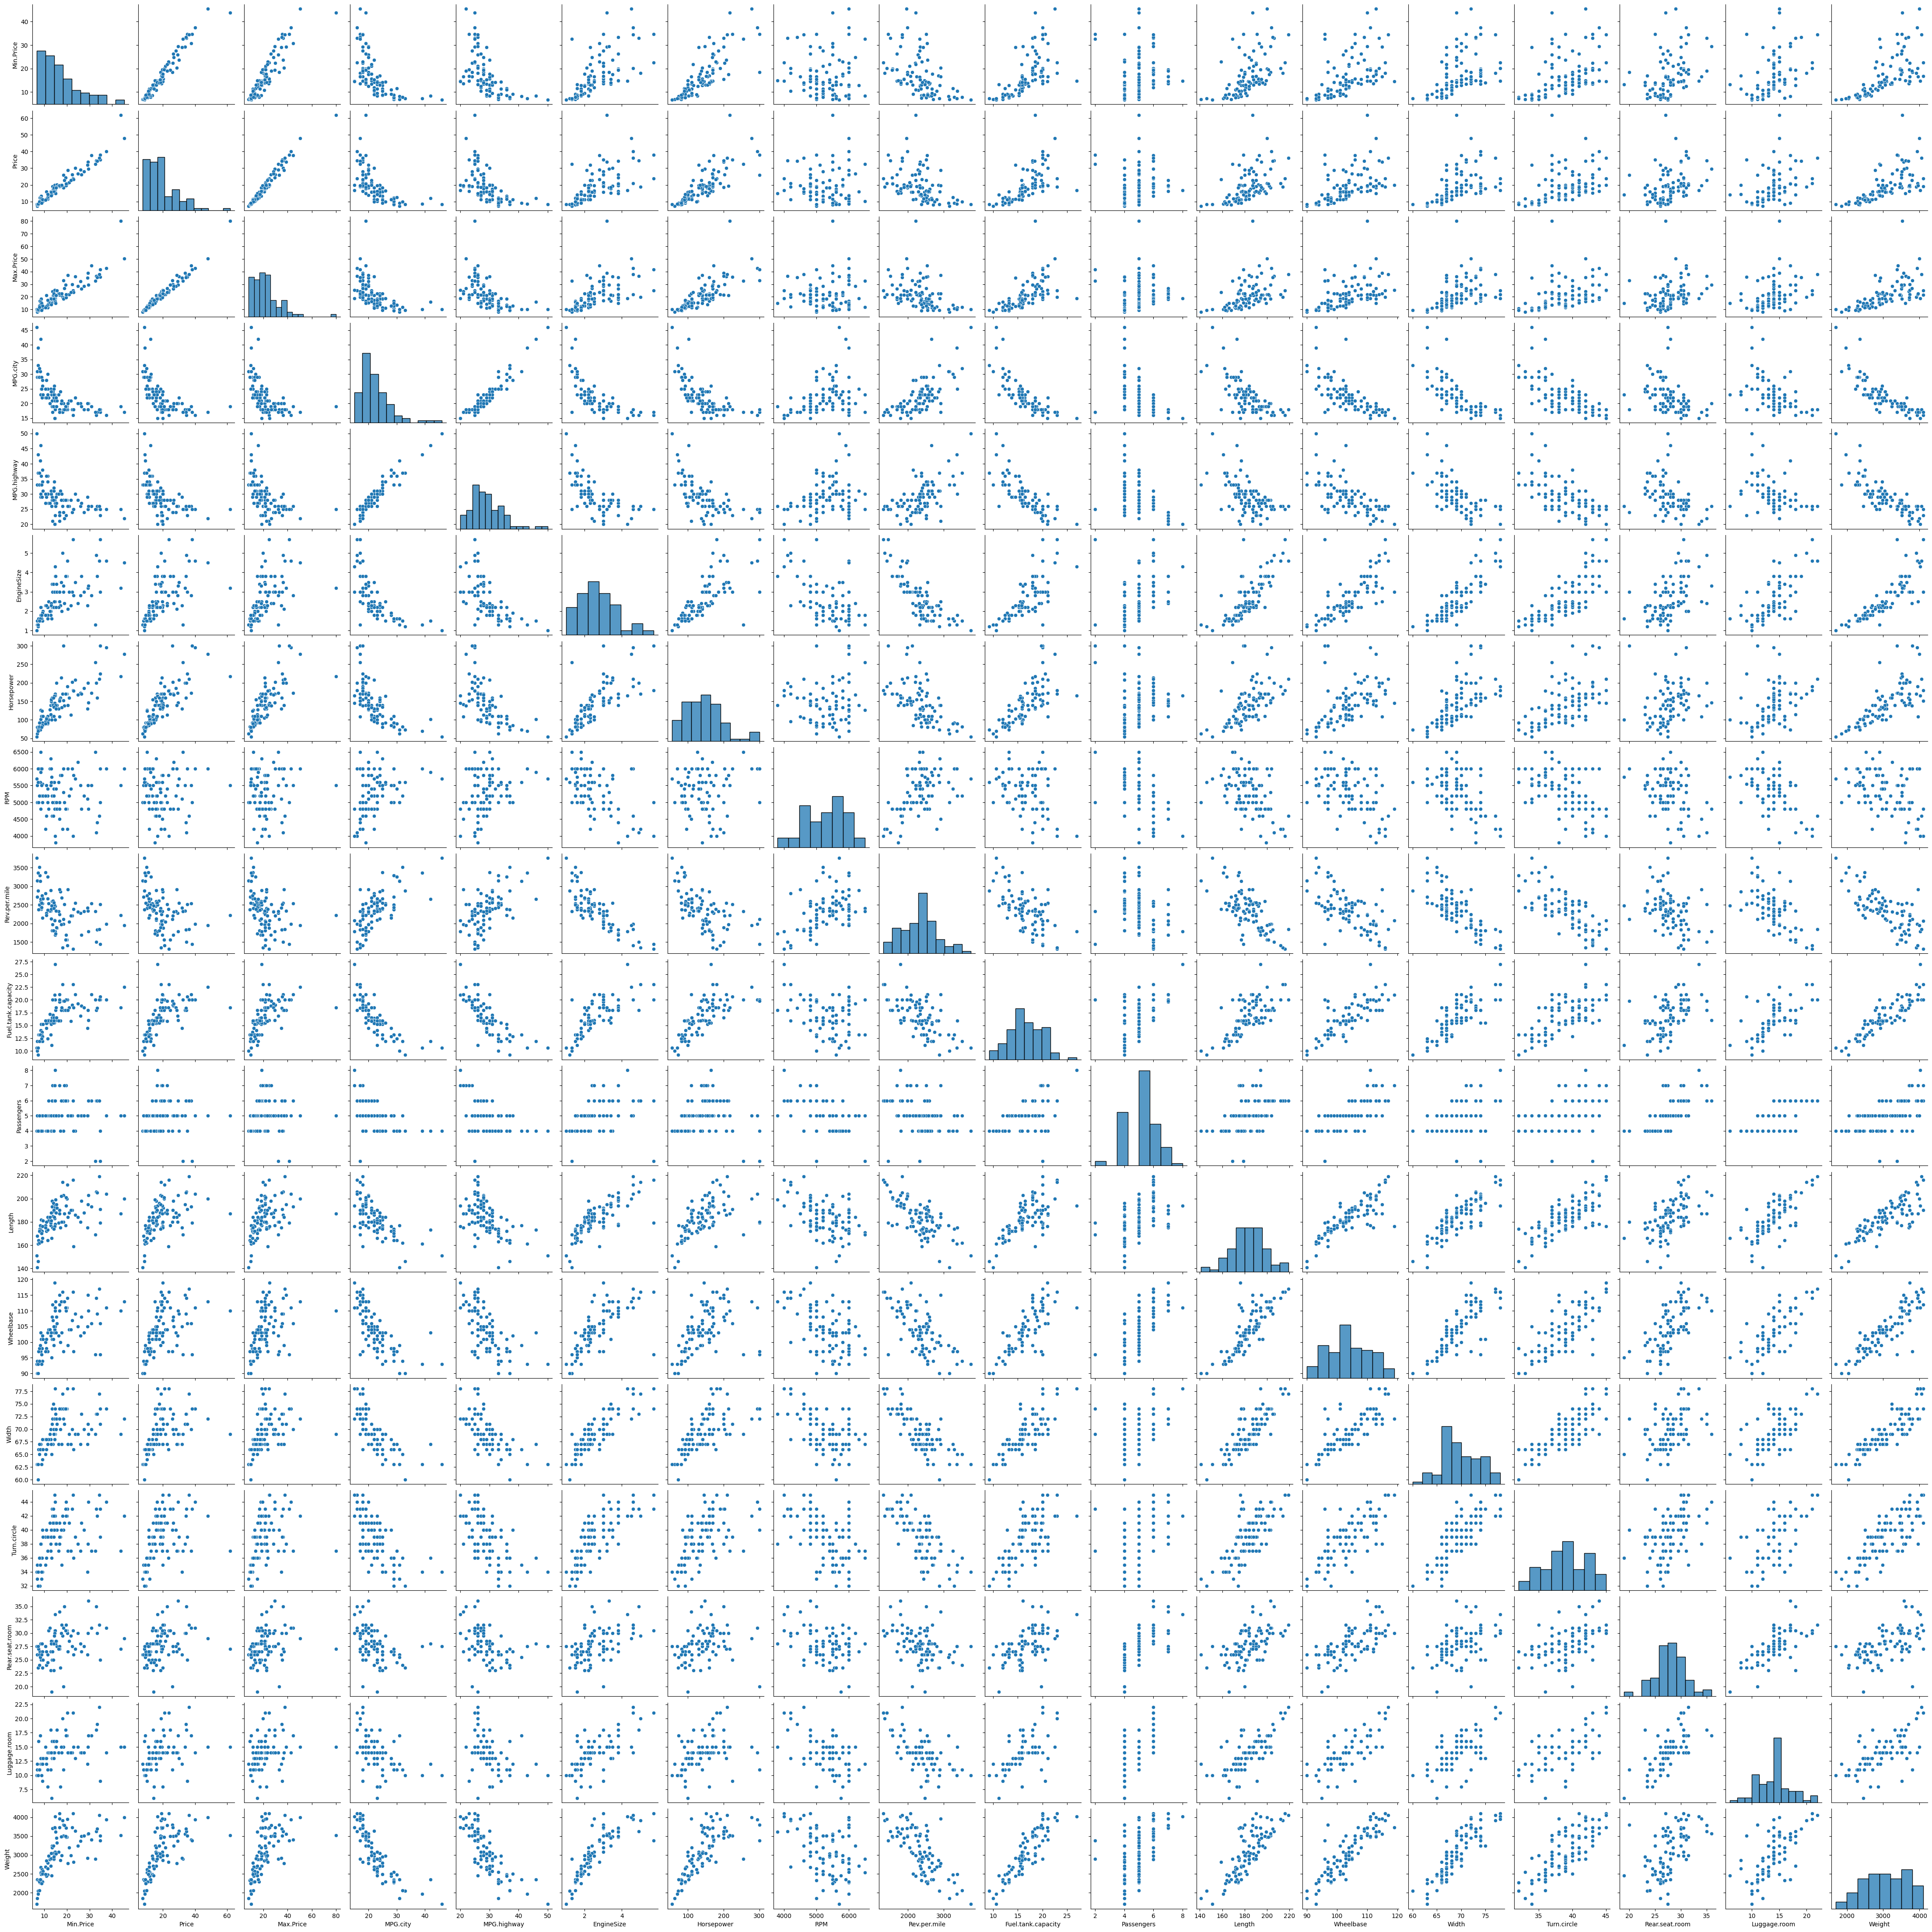

In [14]:
###  use  plot
sns.pairplot(df)

#### seperation of x and  y

In [15]:
x = df.drop(['Weight'] ,  axis  =  1)
y = df['Weight']

In [29]:
x.Model.replace({100: '100' ,  90:'90'  ,323 : '323' , 626:'626' , 900:'900'    , 240:'240' , 850:'850'   } , inplace=True)
 

In [31]:
x.Cylinders.dtype

dtype('O')

In [32]:
x.Cylinders.unique()

array(['4', '6', '8', '3', 'rotary', '5'], dtype=object)

In [33]:
x.Cylinders.value_counts()

Cylinders
4         49
6         31
8          7
3          3
5          2
rotary     1
Name: count, dtype: int64

In [35]:
x.Cylinders.replace({'rotary' : 4} , inplace  =  True)

In [36]:
x.Cylinders = x.Cylinders.astype('float')

### seperation of  categorical and  numerical  features

In [37]:
cat  =  x.columns[x.dtypes == 'object' ]
num  =    x.columns[x.dtypes != 'object' ]

In [38]:
print(cat)
print()
print(num)

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object')


### create pipelines

In [22]:
from  sklearn.pipeline  import Pipeline
from sklearn.preprocessing  import OneHotEncoder  , OrdinalEncoder, StandardScaler
from  sklearn.impute  import SimpleImputer
from  sklearn.compose  import ColumnTransformer

#### create num and  cat pipelines

In [ ]:
num_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean' ))  ,  
                          ('scaler' ,  StandardScaler())])
cat_pipeline  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy = 'most_frequent')) ,  
('encoder' , OrdinalEncoder())])

### compose  both pipelines

In [41]:
pre  =  ColumnTransformer([('cat' ,  cat_pipeline ,  cat) ,  
('num' ,  num_pipeline ,  num)])

In [42]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object'))])

#### apply on data

In [43]:
x_scaled  =  pre.fit_transform(x)

In [44]:
x_scaled

array([[ 0.00000000e+00,  4.80000000e+01,  3.00000000e+00, ...,
        -6.10435875e-01, -4.52197077e-01, -1.03301503e+00],
       [ 0.00000000e+00,  5.50000000e+01,  2.00000000e+00, ...,
        -2.98509851e-01,  7.38090270e-01,  3.96642902e-01],
       [ 1.00000000e+00,  8.00000000e+00,  0.00000000e+00, ...,
        -6.10435875e-01,  5.79260718e-02,  3.92284189e-02],
       ...,
       [ 3.00000000e+01,  2.80000000e+01,  4.00000000e+00, ...,
        -9.22361900e-01, -6.22238126e-01,  3.96642902e-01],
       [ 3.10000000e+01,  2.00000000e+00,  0.00000000e+00, ...,
        -6.10435875e-01,  5.68049220e-01,  3.92284189e-02],
       [ 3.10000000e+01,  7.00000000e+00,  2.00000000e+00, ...,
        -2.98509851e-01,  7.38090270e-01,  3.96642902e-01]],
      shape=(93, 26))

#### convert  in dataframe

In [45]:
x_scaled  =  pd.DataFrame(x_scaled  ,  columns  =  pre.get_feature_names_out())

In [46]:
x_scaled.head()

cat__Manufacturer  cat__Model  cat__Type  cat__AirBags  cat__DriveTrain  \
0                0.0        48.0        3.0           2.0              1.0   
1                0.0        55.0        2.0           0.0              1.0   
2                1.0         8.0        0.0           1.0              1.0   
3                1.0         0.0        2.0           1.0              1.0   
4                2.0         5.0        2.0           1.0              2.0   

   cat__Man.trans.avail  cat__Origin  cat__Make  num__Min.Price  num__Price  \
0                   1.0          1.0        0.0       -0.485787   -0.375720   
1                   1.0          1.0        1.0        1.388017    1.497844   
2                   1.0          1.0        3.0        1.008658    0.998227   
3                   1.0          1.0        2.0        1.571949    1.893374   
4                   1.0          1.0        4.0        0.755752    1.091905   

   ...  num__RPM  num__Rev.per.mile  num__Fuel.tank.capacity  num__Passengers  \
0  ...  1.717489           1.129530                -1.062184        -0.083243   
1  ...  0.369586           0.005661                 0.409445        -0.083243   
2  ...  0.369586          -0.105713                 0.072197        -0.083243   
3  ...  0.369586           0.410659                 1.359872         0.884457   
4  ...  0.706562           0.430909                 1.359872        -1.050944   

   num__Length  num__Wheelbase  num__Width  num__Turn.circle  \
0    -0.427186       -0.286932   -0.366184         -0.610436   
1     0.812171        1.629649    0.431983         -0.298510   
2    -0.220626       -0.286932   -0.632239         -0.610436   
3     0.674465        0.302785    0.165927         -0.610436   
4     0.192493        0.745073   -0.100128          0.013416   

   num__Rear.seat.room  num__Luggage.room  
0            -0.452197          -1.033015  
1             0.738090           0.396643  
2             0.057926           0.039228  
3             1.078172           1.111472  
4            -0.282156          -0.318186  

[5 rows x 26 columns]

In [51]:
col  =  []
for  i  in  x_scaled.columns:
    out  =  i.split('__')[-1]
    col.append(out)

In [52]:
col

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Man.trans.avail',
 'Origin',
 'Make',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'Cylinders',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [53]:
x_scaled.columns  =  col

In [54]:
x_scaled.columns

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower',
       'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object')

#### feature  selection

In [56]:
from  sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [58]:
model  =  LinearRegression()
sel =  SequentialFeatureSelector(estimator  =  model, 
direction = 'forward' ,
 n_jobs  =  -1)

In [59]:
# fit data  on sel variable
sel.fit(x_scaled  , y)

SequentialFeatureSelector(estimator=LinearRegression(), n_jobs=-1)

In [61]:
selected_feature = sel.get_feature_names_out()

In [62]:
selected_feature 

array(['Manufacturer', 'Type', 'Origin', 'Min.Price', 'MPG.highway',
       'Horsepower', 'RPM', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Rear.seat.room'], dtype=object)

In [63]:
x1  =  x[selected_feature]

In [64]:
x1

Manufacturer     Type   Origin  Min.Price  MPG.highway  Horsepower   RPM  \
0         Acura    Small  non-USA       12.9           31         140  6300   
1         Acura  Midsize  non-USA       29.2           25         200  5500   
2          Audi  Compact  non-USA       25.9           26         172  5500   
3          Audi  Midsize  non-USA       30.8           26         172  5500   
4           BMW  Midsize  non-USA       23.7           30         208  5700   
..          ...      ...      ...        ...          ...         ...   ...   
88   Volkswagen      Van  non-USA       16.6           21         109  4500   
89   Volkswagen  Compact  non-USA       17.6           30         134  5800   
90   Volkswagen   Sporty  non-USA       22.9           25         178  5800   
91        Volvo  Compact  non-USA       21.8           28         114  5400   
92        Volvo  Midsize  non-USA       24.8           28         168  6200   

    Fuel.tank.capacity  Passengers  Length  Wheelbase  Width  Rear.seat.room  
0                 13.2           5     177        102     68            26.5  
1                 18.0           5     195        115     71            30.0  
2                 16.9           5     180        102     67            28.0  
3                 21.1           6     193        106     70            31.0  
4                 21.1           4     186        109     69            27.0  
..                 ...         ...     ...        ...    ...             ...  
88                21.1           7     187        115     72            34.0  
89                18.5           5     180        103     67            31.5  
90                18.5           4     159         97     66            26.0  
91                15.8           5     190        104     67            29.5  
92                19.3           5     184        105     69            30.0  

[93 rows x 13 columns]

In [65]:
cat1  =  x1.columns[x1.dtypes == 'object' ]
num1 =    x1.columns[x1.dtypes != 'object' ]

In [68]:
num_pipeline1  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean' ))  ,  
                          ('scaler' ,  StandardScaler())])
cat_pipeline1  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy = 'most_frequent')) ,  
('encoder' , OneHotEncoder(handle_unknown='ignore'))])

In [69]:
pre1  =  ColumnTransformer([('cat1' ,  cat_pipeline1 ,  cat1) ,  
('num1' ,  num_pipeline1 ,  num1)])

### convert data

In [73]:
final_x  = pre1.fit_transform(x1)

In [75]:
final_x =  final_x.toarray()

In [76]:
final_x

array([[ 1.        ,  0.        ,  0.        , ..., -0.28693241,
        -0.3661839 , -0.45219708],
       [ 1.        ,  0.        ,  0.        , ...,  1.62964924,
         0.43198257,  0.73809027],
       [ 0.        ,  1.        ,  0.        , ..., -0.28693241,
        -0.63223939,  0.05792607],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.02407919,
        -0.89829488, -0.62223813],
       [ 0.        ,  0.        ,  0.        , ...,  0.00792631,
        -0.63223939,  0.56804922],
       [ 0.        ,  0.        ,  0.        , ...,  0.15535567,
        -0.10012841,  0.73809027]], shape=(93, 50))

In [78]:
final_x  =  pd.DataFrame(final_x  ,  columns  =  pre1.get_feature_names_out())

In [79]:
final_x.head()

cat1__Manufacturer_Acura  cat1__Manufacturer_Audi  cat1__Manufacturer_BMW  \
0                       1.0                      0.0                     0.0   
1                       1.0                      0.0                     0.0   
2                       0.0                      1.0                     0.0   
3                       0.0                      1.0                     0.0   
4                       0.0                      0.0                     1.0   

   cat1__Manufacturer_Buick  cat1__Manufacturer_Cadillac  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   cat1__Manufacturer_Chevrolet  cat1__Manufacturer_Chrylser  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   cat1__Manufacturer_Chrysler  cat1__Manufacturer_Dodge  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   

   cat1__Manufacturer_Eagle  ...  num1__Min.Price  num1__MPG.highway  \
0                       0.0  ...        -0.485787           0.360925   
1                       0.0  ...         1.388017          -0.770514   
2                       0.0  ...         1.008658          -0.581941   
3                       0.0  ...         1.571949          -0.581941   
4                       0.0  ...         0.755752           0.172352   

   num1__Horsepower  num1__RPM  num1__Fuel.tank.capacity  num1__Passengers  \
0         -0.073484   1.717489                 -1.062184         -0.083243   
1          1.078322   0.369586                  0.409445         -0.083243   
2          0.540813   0.369586                  0.072197         -0.083243   
3          0.540813   0.369586                  1.359872          0.884457   
4          1.231897   0.706562                  1.359872         -1.050944   

   num1__Length  num1__Wheelbase  num1__Width  num1__Rear.seat.room  
0     -0.427186        -0.286932    -0.366184             -0.452197  
1      0.812171         1.629649     0.431983              0.738090  
2     -0.220626        -0.286932    -0.632239              0.057926  
3      0.674465         0.302785     0.165927              1.078172  
4      0.192493         0.745073    -0.100128             -0.282156  

[5 rows x 50 columns]